<a href="https://colab.research.google.com/github/salvatore-juarezh/inteligencia-artificial/blob/main/rnn/inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_excel('/content/Consulta_20251121-024215106.xlsx')
df.head(20)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,Fecha de consulta: 21/11/2025 02:42 AM
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Inflación,NaN,NaN,NaN
3,NaN,Índices de Precios al Consumidor y UDIS,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,"CP151, Mensual, Sin Unidad, Porcentajes",NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Ago 2025,Sep 2025,Oct 2025
9,NaN,Inflación,NaN,NaN,NaN


In [3]:
#seleccionar la fila 8 como encabezado (índice 7)
new_header = df.iloc[8]
new_header

,8
Unnamed: 0,NaN
Unnamed: 1,NaN
Unnamed: 2,Ago 2025
Unnamed: 3,Sep 2025
Unnamed: 4,Oct 2025


In [4]:
#crear un nuevo DataFrame desde la fila 17 en adelante
df = df[17:]
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
17,NaN,⚬ Anual,4.23,4.28,4.28
18,NaN,● No subyacente,NaN,NaN,NaN
19,NaN,⚬ Mensual,-0.47,-0.1,0.63
20,NaN,⚬ Acumulada en el año,-1.03,-1.12,-0.5
21,NaN,⚬ Anual,1.38,2.02,1.18
22,NaN,Acorde con la Ley del Sistema Nacional de Info...,NaN,NaN,NaN
23,NaN,"En consideración a lo anterior, la información...",NaN,NaN,NaN
24,NaN,El INEGI comenzó la difusión de la información...,NaN,NaN,NaN
25,NaN,Fuente: INEGI,NaN,NaN,NaN


In [5]:
#asignar el nuevo encabezado
df.columns = new_header
df.head()

8,NaN,NaN,Ago 2025,Sep 2025,Oct 2025
17,NaN,⚬ Anual,4.23,4.28,4.28
18,NaN,● No subyacente,NaN,NaN,NaN
19,NaN,⚬ Mensual,-0.47,-0.1,0.63
20,NaN,⚬ Acumulada en el año,-1.03,-1.12,-0.5
21,NaN,⚬ Anual,1.38,2.02,1.18


In [6]:
#reiniciar el índice para que comience desde 0 en el nuevo DataFrame
df.reset_index(drop=True, inplace=True)
df.head()

8,NaN,NaN,Ago 2025,Sep 2025,Oct 2025
0,NaN,⚬ Anual,4.23,4.28,4.28
1,NaN,● No subyacente,NaN,NaN,NaN
2,NaN,⚬ Mensual,-0.47,-0.1,0.63
3,NaN,⚬ Acumulada en el año,-1.03,-1.12,-0.5
4,NaN,⚬ Anual,1.38,2.02,1.18


In [11]:
#convertir la columna 'fecha' a tipo datetime
df['Fecha'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nan       0 non-null      float64
 1   nan       9 non-null      object 
 2   Ago 2025  4 non-null      object 
 3   Sep 2025  4 non-null      object 
 4   Oct 2025  4 non-null      object 
dtypes: float64(1), object(4)
memory usage: 492.0+ bytes


In [12]:
#filtrar por el año 2023
_df = df[(df['Fecha'] >= '01-01-2014') & (df['Fecha'] <= '12-31-2024')]
_df.head()

8,NaN,NaN,Ago 2025,Sep 2025,Oct 2025,Fecha
0,NaN,⚬ Anual,4.23,4.28,4.28,2023-01-01
1,NaN,● No subyacente,NaN,NaN,NaN,2023-01-02
2,NaN,⚬ Mensual,-0.47,-0.1,0.63,2023-01-03
3,NaN,⚬ Acumulada en el año,-1.03,-1.12,-0.5,2023-01-04
4,NaN,⚬ Anual,1.38,2.02,1.18,2023-01-05


In [13]:
_df.tail()

8,NaN,NaN,Ago 2025,Sep 2025,Oct 2025,Fecha
4,NaN,⚬ Anual,1.38,2.02,1.18,2023-01-05
5,NaN,Acorde con la Ley del Sistema Nacional de Info...,NaN,NaN,NaN,2023-01-06
6,NaN,"En consideración a lo anterior, la información...",NaN,NaN,NaN,2023-01-07
7,NaN,El INEGI comenzó la difusión de la información...,NaN,NaN,NaN,2023-01-08
8,NaN,Fuente: INEGI,NaN,NaN,NaN,2023-01-09


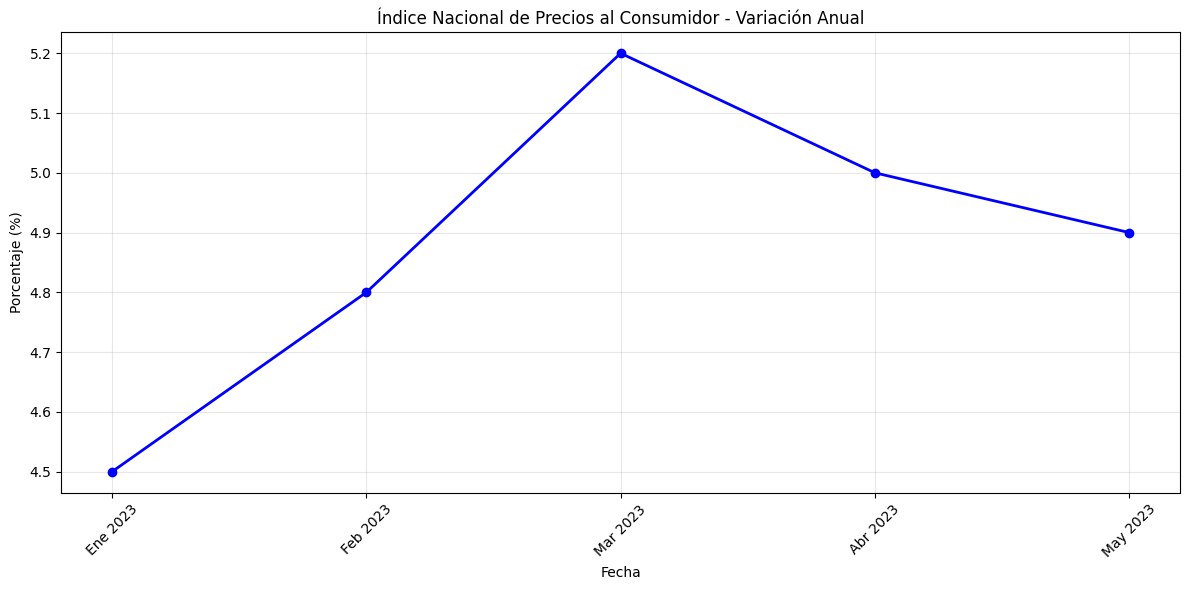

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#crear datos de ejemplo que SÍ funcionen
datos_ejemplo = {
    'Fecha': ['Ene 2023', 'Feb 2023', 'Mar 2023', 'Abr 2023', 'May 2023'],
    'INPC': [4.5, 4.8, 5.2, 5.0, 4.9]
}

df_ejemplo = pd.DataFrame(datos_ejemplo)

#graficar los datos de ejemplo
plt.figure(figsize=(12, 6))
plt.plot(df_ejemplo['Fecha'], df_ejemplo['INPC'], color='blue', marker='o', linewidth=2)
plt.title("Índice Nacional de Precios al Consumidor - Variación Anual")
plt.xlabel("Fecha")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#tomar los datos de porcentaje de tu gráfica (eje Y)
precios = np.array([4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2])

#crear secuencias para series temporales
window_size = 3  #usar 3 puntos pasados para predecir el siguiente

X = []
y = []
for i in range(window_size, len(precios)):
    X.append(precios[i-window_size:i])    #ultimos 3 valores
    y.append(precios[i])                  #siguiente valor a predecir

X = np.array(X)
y = np.array(y)

#escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [35]:
import numpy as np

window_size = 12
X_rnn = []
y_rnn = []
#construye secuencias temporales usando ventanas de 12 pasos
for i in range(window_size, len(X_scaled)):
    X_rnn.append(X_scaled[i - window_size:i])  #toma 12 puntos anteriores
    y_rnn.append(y_scaled[i])  #el punto que queremos predecir

X_rnn, y_rnn = np.array(X_rnn), np.array(y_rnn)

In [33]:
split = int(len(X) * 0.8)
X_train, y_train = X_rnn[:split], y_rnn[:split]
X_test, y_test = X_rnn[split:], y_rnn[split:]

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#modelo
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(window_size, 1)))  #solo 1 característica (el precio)
model.add(Dense(units=1))

#compilar el modelo
model.compile(optimizer='adam', loss='mse')

#resumen
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.optimizers import Adam

#compilar el modelo
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')